In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

#Load the compact dataset
df = pd.read_parquet("mushroom_compact.parquet", engine="fastparquet")

cols_to_drop = [
    "cap-surface",
    "gill-attachment",
    "gill-spacing",
    "stem-root",
    "stem-surface",
    "veil-type",
    "veil-color",
    "spore-print-color",
]
df_model = df.drop(columns=cols_to_drop).copy()

# Use the same categorical-only dataset from Chi-square
df_cramer = df_model.copy()

# Drop numeric features
df_cramer = df_cramer.drop(columns=["cap-diameter", "stem-height", "stem-width"])

# Convert everything to object/string (important)
df_cramer = df_cramer.astype("object")

# Function to compute Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Correct for bias (recommended for large tables)
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Compute correlation matrix
cols = df_cramer.columns
cramer_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), 
                             index=cols, columns=cols)

for c1 in cols:
    for c2 in cols:
        cramer_matrix.loc[c1, c2] = cramers_v(df_cramer[c1], df_cramer[c2])

cramer_matrix


,class,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-color,has-ring,ring-type,habitat,season
class,1.000000,0.174967,0.246233,0.013024,0.199085,0.247945,0.056916,0.205618,0.180448,0.132098
cap-shape,0.174967,1.000000,0.147797,0.320471,0.298755,0.174888,0.230705,0.185745,0.171809,0.154183
cap-color,0.246233,0.147797,1.000000,0.158670,0.262269,0.314211,0.178432,0.152005,0.160967,0.108626
does-bruise-or-bleed,0.013024,0.320471,0.158670,0.999999,0.223667,0.203370,0.020140,0.217485,0.138846,0.148823
gill-color,0.199085,0.298755,0.262269,0.223667,1.000000,0.284059,0.223005,0.168151,0.154298,0.137079
stem-color,0.247945,0.174888,0.314211,0.203370,0.284059,1.000000,0.230744,0.147005,0.136009,0.137170
has-ring,0.056916,0.230705,0.178432,0.020140,0.223005,0.230744,1.000000,0.887097,0.247866,0.034390
ring-type,0.205618,0.185745,0.152005,0.217485,0.168151,0.147005,0.887097,1.000000,0.208323,0.071885
habitat,0.180448,0.171809,0.160967,0.138846,0.154298,0.136009,0.247866,0.208323,1.000000,0.076999
season,0.132098,0.154183,0.108626,0.148823,0.137079,0.137170,0.034390,0.071885,0.076999,1.000000


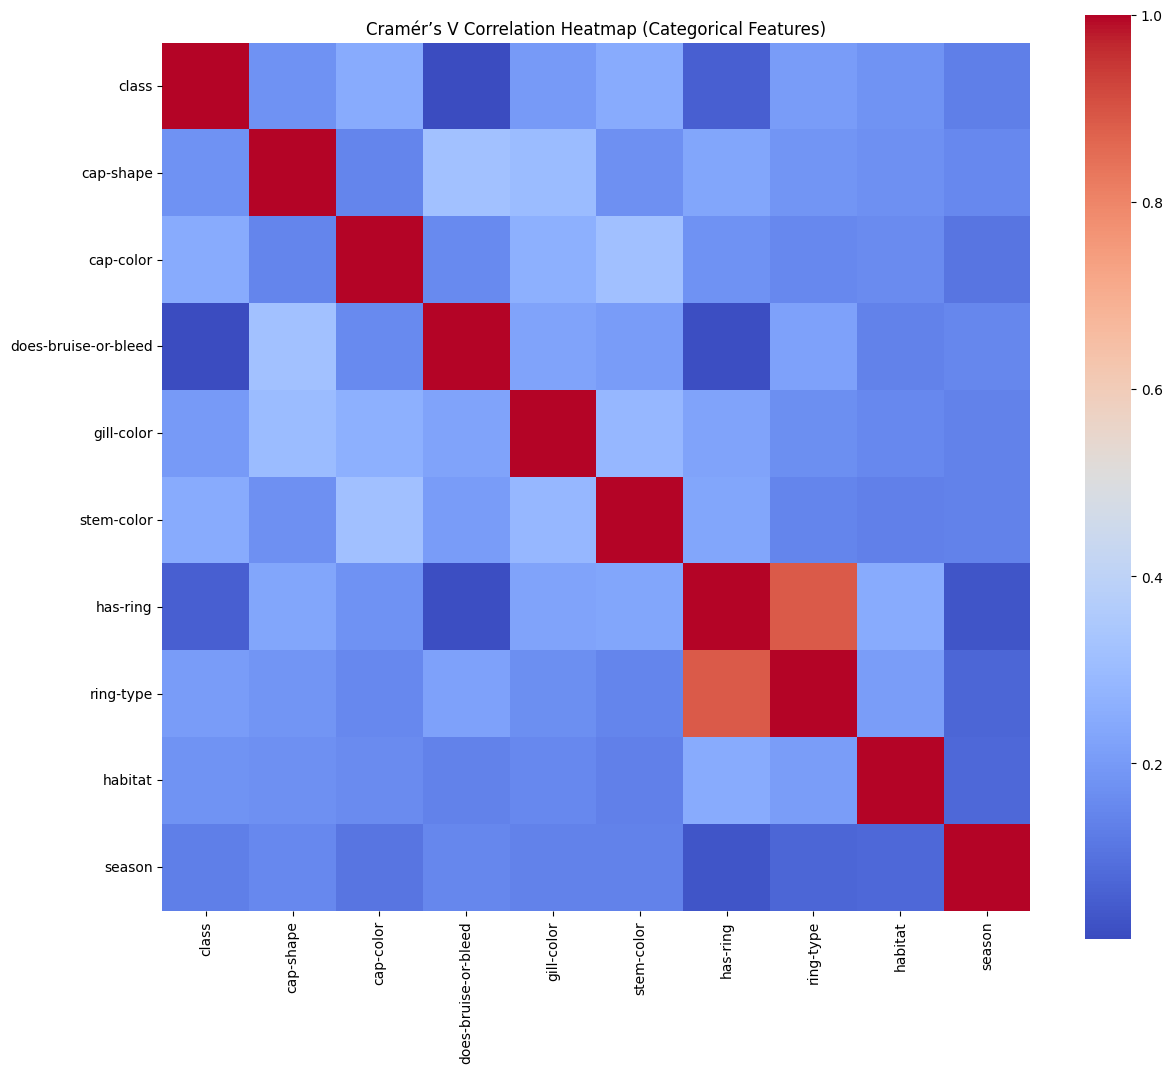

In [3]:
#heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cramer_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Cramér’s V Correlation Heatmap (Categorical Features)")
plt.show()
